In [1]:
import numpy as np
import pandas as pd
from utils import *

In [2]:
metadata = pd.read_csv('alpha_genome_metadata.csv')
metadata

,name,strand,Assay title,ontology_curie,biosample_name,biosample_type,biosample_life_stage,data_source,endedness,genetically_modified,output_type,gtex_tissue,histone_mark,transcription_factor
0,CL:0000084 ATAC-seq,.,ATAC-seq,CL:0000084,T-cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
1,CL:0000100 ATAC-seq,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
2,CL:0000236 ATAC-seq,.,ATAC-seq,CL:0000236,B cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
3,CL:0000623 ATAC-seq,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
4,CL:0000624 ATAC-seq,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,ENCSR182QNJ,-,PRO-cap,EFO:0001099,Caco-2,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
5559,ENCSR740IPL,-,PRO-cap,EFO:0002067,K562,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
5560,ENCSR797DEF,-,PRO-cap,EFO:0002819,Calu3,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
5561,ENCSR801ECP,-,PRO-cap,CL:0002618,endothelial cell of umbilical vein,primary_cell,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN


In [3]:
# metadata[metadata['Assay title'] == 'DNase-seq']
# metadata[metadata['Assay title'] == 'Histone ChIP-seq']

metadata['output_type'].value_counts()


output_type
OutputType.CHIP_TF              1617
OutputType.CHIP_HISTONE         1116
OutputType.SPLICE_SITE_USAGE     734
OutputType.RNA_SEQ               667
OutputType.CAGE                  546
OutputType.SPLICE_JUNCTIONS      367
OutputType.DNASE                 305
OutputType.ATAC                  167
OutputType.CONTACT_MAPS           28
OutputType.PROCAP                 12
OutputType.SPLICE_SITES            4
Name: count, dtype: int64

In [4]:
metadata['Assay title'].value_counts()

Assay title
TF ChIP-seq           1617
Histone ChIP-seq      1116
total RNA-seq          784
polyA plus RNA-seq     617
hCAGE                  516
DNase-seq              305
ATAC-seq               167
LQhCAGE                 30
in situ Hi-C            24
PRO-cap                 12
Micro-C                  3
Dilution Hi-C            1
Name: count, dtype: int64

In [5]:
metadata['cell_type'] = metadata['biosample_name']
metadata['assay'] = metadata['Assay title']

mask = (metadata['Assay title'] == 'ATAC-seq')
metadata.loc[mask, 'assay'] = 'ATAC'
mask = (metadata['Assay title'] == 'DNase-seq')
metadata.loc[mask, 'assay'] = 'DNase'
mask = (metadata['Assay title'] == 'TF ChIP-seq')
metadata.loc[mask, 'assay'] = metadata.loc[mask, 'transcription_factor']
mask = (metadata['Assay title'] == 'Histone ChIP-seq')
metadata.loc[mask, 'assay'] = metadata.loc[mask, 'histone_mark']

metadata['index'] = metadata.index

In [6]:
df_pivot = metadata.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)

df_pivot

assay,ADNP,AFF1,AFF4,AGO1,AGO2,AHDC1,AHR,AKAP8,ARHGAP35,ARID1B,...,ZSCAN5A,ZSCAN5C,ZSCAN9,ZXDB,ZXDC,ZZZ3,hCAGE,in situ Hi-C,polyA plus RNA-seq,total RNA-seq
cell_type,,,,,,,,,,,,,,,,,,,,,
22Rv1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[319, 592]",NaN,NaN,"[1140, 1411, 4564, 4931]"
A375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1141, 1412, 4565, 4932]"
A549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[311, 584]",NaN,"[1125, 1396, 4548, 4915]",NaN
A673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1142, 1413, 4566, 4933]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vermiform appendix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[362, 635]",NaN,NaN,NaN
vertebral mesenchymal stem cell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[267, 540]",NaN,NaN,NaN
visceral preadipocyte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[276, 549]",NaN,NaN,NaN


In [7]:
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

df_pivot = df_pivot.loc[cell_types, assays]
df_pivot

assay,DNase,H3K4me3,H3K27ac,CTCF
cell_type,,,,
K562,[831],[2082],[2077],[3689]
HepG2,[822],[2028],[2023],"[3065, 3066]"
SK-N-SH,[866],[2201],[2196],[4194]
HCT116,[859],[2155],[2150],"[4128, 4129, 4130, 4131, 4132, 4133, 4134, 413..."
A549,[820],[2016],[2013],[2870]


In [8]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *

In [9]:
pred_dnase = load_h5('Gosai_AlphaGenome_DNase.h5')
print(pred_dnase.shape)

pred_histone = load_h5('Gosai_AlphaGenome_histone.h5')
print(pred_histone.shape)

MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data_len200_norm.csv')
print(MPRA_df.shape)

(760679, 305)
(760679, 1116)
(760679, 14)


In [10]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_pivot.loc[cell_type, assay]

        if assay == 'DNase':
            indice = [i-713 for i in indice]
            pred_array = pred_dnase
        elif assay in ['H3K4me3', 'H3K27ac']:
            indice = [i-1685 for i in indice]
            pred_array = pred_histone
        elif assay == 'ATAC':
            MPRA_df[f'{cell_type}_{assay}'] = np.nan
            continue
        elif assay == 'CTCF':
            MPRA_df[f'{cell_type}_{assay}'] = np.nan
            continue

        if isinstance(indice, list) and len(indice) > 0:
            # for idx in indice:
            #     pred = logit(pred_array[:, idx])
            #     true = MPRA_df[cell_type]
            #     r, _ = pearson(pred, true)
            #     print(cell_type, assay, idx, r)
            pred = pred_array[:, indice].mean(1)
            MPRA_df[f'{cell_type}_{assay}'] = pred
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan

MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.027,9.594,5.484,NaN,0.024,5.500,4.406,NaN,0.025,3.938,1.469,NaN,0.027,7.000,13.312,NaN,0.016,7.750,5.016,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.030,10.188,5.922,NaN,0.026,5.844,4.781,NaN,0.030,4.297,1.617,NaN,0.029,7.594,14.781,NaN,0.018,8.312,5.422,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.018,4.844,5.656,NaN,0.023,6.531,4.406,NaN,0.004,5.938,3.734,NaN,0.024,6.812,6.422,NaN,0.010,7.516,5.203,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.018,4.906,5.734,NaN,0.022,6.312,4.469,NaN,0.004,6.297,4.086,NaN,0.024,6.812,6.594,NaN,0.010,8.125,6.031,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.006,2.500,3.656,NaN,0.013,4.344,3.344,NaN,0.004,3.797,2.203,NaN,0.014,4.062,4.906,NaN,0.008,5.125,2.258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.164,31.250,16.469,NaN,0.081,17.312,12.406,NaN,0.058,15.219,7.656,NaN,0.116,24.938,41.375,NaN,0.042,22.625,12.812,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.014,3.094,4.305,NaN,0.012,3.359,2.844,NaN,0.005,2.320,1.188,NaN,0.015,3.336,5.016,NaN,0.007,4.141,2.234,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.021,4.062,5.656,NaN,0.026,5.062,4.344,NaN,0.006,3.742,2.906,NaN,0.032,5.812,13.531,NaN,0.014,9.969,18.500,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.015,3.773,4.703,NaN,0.015,4.023,3.336,NaN,0.005,2.961,1.773,NaN,0.020,4.391,6.031,NaN,0.007,4.609,2.328,NaN


In [12]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv', index=False)

In [45]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.027,9.594,5.484,NaN,0.024,5.500,4.406,NaN,0.025,3.938,1.469,NaN,0.027,7.000,13.312,NaN,0.016,7.750,5.016,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.030,10.188,5.922,NaN,0.026,5.844,4.781,NaN,0.030,4.297,1.617,NaN,0.029,7.594,14.781,NaN,0.018,8.312,5.422,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.018,4.844,5.656,NaN,0.023,6.531,4.406,NaN,0.004,5.938,3.734,NaN,0.024,6.812,6.422,NaN,0.010,7.516,5.203,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.018,4.906,5.734,NaN,0.022,6.312,4.469,NaN,0.004,6.297,4.086,NaN,0.024,6.812,6.594,NaN,0.010,8.125,6.031,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.006,2.500,3.656,NaN,0.013,4.344,3.344,NaN,0.004,3.797,2.203,NaN,0.014,4.062,4.906,NaN,0.008,5.125,2.258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.164,31.250,16.469,NaN,0.081,17.312,12.406,NaN,0.058,15.219,7.656,NaN,0.116,24.938,41.375,NaN,0.042,22.625,12.812,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.014,3.094,4.305,NaN,0.012,3.359,2.844,NaN,0.005,2.320,1.188,NaN,0.015,3.336,5.016,NaN,0.007,4.141,2.234,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.021,4.062,5.656,NaN,0.026,5.062,4.344,NaN,0.006,3.742,2.906,NaN,0.032,5.812,13.531,NaN,0.014,9.969,18.500,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.015,3.773,4.703,NaN,0.015,4.023,3.336,NaN,0.005,2.961,1.773,NaN,0.020,4.391,6.031,NaN,0.007,4.609,2.328,NaN


In [46]:
pearson_df = pd.DataFrame(dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF
K562,0.517,0.475,0.440,NaN
HepG2,0.406,0.447,0.249,NaN
SK-N-SH,0.482,0.505,0.291,NaN
HCT116,0.460,0.461,0.393,NaN
A549,0.443,0.440,0.326,NaN


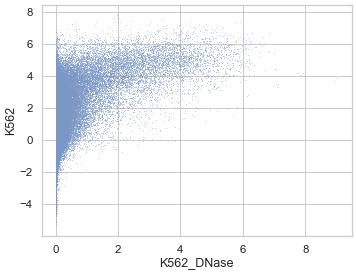

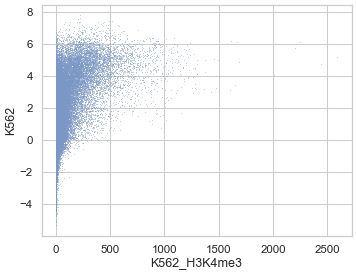

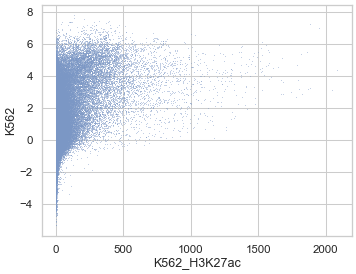

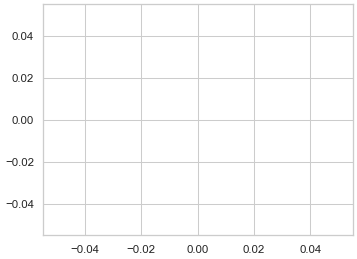

In [47]:
for i, cell_type in enumerate(cell_types[:1]):
    for j, assay in enumerate(assays):
        plt.figure(figsize=(8, 6), dpi=50)
        x = MPRA_df[f'{cell_type}_{assay}'].copy()
        y = MPRA_df[cell_type].copy()
        sns.scatterplot(x=x, y=y, s=1)

In [48]:
feature_cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
x = MPRA_df[feature_cols].copy()
print(x.mean(), x.median())

K562_DNase         0.059
K562_H3K4me3      10.943
K562_H3K27ac      12.840
K562_CTCF            NaN
HepG2_DNase        0.034
HepG2_H3K4me3      6.841
HepG2_H3K27ac     12.059
HepG2_CTCF           NaN
SK-N-SH_DNase      0.016
SK-N-SH_H3K4me3    5.625
SK-N-SH_H3K27ac    7.334
SK-N-SH_CTCF         NaN
HCT116_DNase       0.057
HCT116_H3K4me3    10.091
HCT116_H3K27ac    29.332
HCT116_CTCF          NaN
A549_DNase         0.016
A549_H3K4me3       9.972
A549_H3K27ac      12.174
A549_CTCF            NaN
dtype: float64 K562_DNase        0.014
K562_H3K4me3      4.203
K562_H3K27ac      4.703
K562_CTCF           NaN
HepG2_DNase       0.016
HepG2_H3K4me3     4.305
HepG2_H3K27ac     3.836
HepG2_CTCF          NaN
SK-N-SH_DNase     0.006
SK-N-SH_H3K4me3   3.352
SK-N-SH_H3K27ac   1.797
SK-N-SH_CTCF        NaN
HCT116_DNase      0.020
HCT116_H3K4me3    4.406
HCT116_H3K27ac    7.266
HCT116_CTCF         NaN
A549_DNase        0.009
A549_H3K4me3      5.750
A549_H3K27ac      3.461
A549_CTCF           NaN
dtype

In [50]:
feature_cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
x = MPRA_df[feature_cols].copy()
print(x.mean(), x.median())
x = x / x.median()
print(x.mean(), x.median())
x = np.log1p(x)
print(x.mean(), x.median())
x = (x - x.mean()) / x.std()
print(x.mean(), x.std())

K562_DNase         0.059
K562_H3K4me3      10.943
K562_H3K27ac      12.840
K562_CTCF            NaN
HepG2_DNase        0.034
HepG2_H3K4me3      6.841
HepG2_H3K27ac     12.059
HepG2_CTCF           NaN
SK-N-SH_DNase      0.016
SK-N-SH_H3K4me3    5.625
SK-N-SH_H3K27ac    7.334
SK-N-SH_CTCF         NaN
HCT116_DNase       0.057
HCT116_H3K4me3    10.091
HCT116_H3K27ac    29.332
HCT116_CTCF          NaN
A549_DNase         0.016
A549_H3K4me3       9.972
A549_H3K27ac      12.174
A549_CTCF            NaN
dtype: float64 K562_DNase        0.014
K562_H3K4me3      4.203
K562_H3K27ac      4.703
K562_CTCF           NaN
HepG2_DNase       0.016
HepG2_H3K4me3     4.305
HepG2_H3K27ac     3.836
HepG2_CTCF          NaN
SK-N-SH_DNase     0.006
SK-N-SH_H3K4me3   3.352
SK-N-SH_H3K27ac   1.797
SK-N-SH_CTCF        NaN
HCT116_DNase      0.020
HCT116_H3K4me3    4.406
HCT116_H3K27ac    7.266
HCT116_CTCF         NaN
A549_DNase        0.009
A549_H3K4me3      5.750
A549_H3K27ac      3.461
A549_CTCF           NaN
dtype

<Axes: xlabel='K562_DNase', ylabel='K562'>

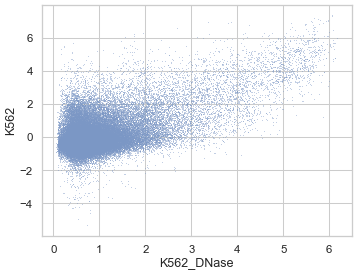

In [35]:
cell_type = 'K562'
assay = 'DNase'

plt.figure(figsize=(8, 6), dpi=50)
x = MPRA_df[f'{cell_type}_{assay}'].copy()

x = x / x.median()
x = np.log(1+x)

y = MPRA_df[cell_type].copy()

sns.scatterplot(x=x[:100000], y=y[:100000], s=1)

In [51]:
feature_cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]

x = MPRA_df[feature_cols].copy()
x = x / x.median()
x = np.log(1+x)
x = x = (x - x.mean()) / x.std()
MPRA_df[feature_cols] = x

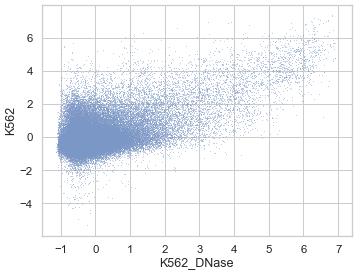

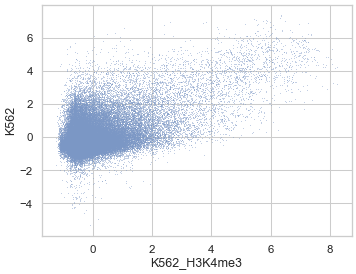

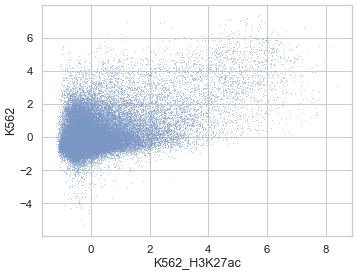

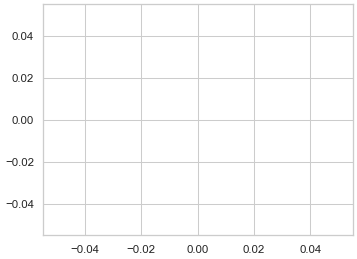

In [52]:
for i, cell_type in enumerate(cell_types[:1]):
    for j, assay in enumerate(assays):
        plt.figure(figsize=(8, 6), dpi=50)
        x = MPRA_df[f'{cell_type}_{assay}'].copy()
        y = MPRA_df[cell_type].copy()
        sns.scatterplot(x=x[:100000], y=y[:100000], s=1)

In [53]:
pearson_df = pd.DataFrame(dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        df = MPRA_df
        pred = df[f'{cell_type}_{assay}']
        true = df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF
K562,0.619,0.576,0.543,NaN
HepG2,0.549,0.527,0.497,NaN
SK-N-SH,0.492,0.537,0.499,NaN
HCT116,0.571,0.570,0.550,NaN
A549,0.358,0.441,0.426,NaN


In [54]:
MPRA_df.to_csv('Gosai_MPRA_seq_feature_alphagenome_scale_log1p_zscore.csv', index=False)

In [18]:
# feature_cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]

# x = MPRA_df[feature_cols].copy()
# x = np.arcsinh(x)
# MPRA_df[feature_cols] = x


# x = MPRA_df[feature_cols].copy()
# x = np.log(1+x)
# MPRA_df[feature_cols] = x

# from sklearn.preprocessing import QuantileTransformer
# x = MPRA_df[feature_cols].copy()
# transformer = QuantileTransformer(n_quantiles=10000, output_distribution="normal")
# x_trans = transformer.fit_transform(x)
# MPRA_df[feature_cols] = x_trans
# # quantile归一化会抹除较大信号的数值差异，导致相关性下降，虽然后面的模型可能会重新发现这个规律，但是先不用这个方案

In [14]:
for j, assay in enumerate(assays):
    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}']
        if x.isnull().sum() > 0:
            continue
        print(f'{cell_type}_{assay}')
        print(f"mean={x.mean():.3f}, std={x.std():.3f}")

K562_DNase
mean=-0.007, std=1.005
HepG2_DNase
mean=-0.022, std=0.998
SK-N-SH_DNase
mean=-0.004, std=0.991
HCT116_DNase
mean=0.005, std=1.005
A549_DNase
mean=0.002, std=0.999
K562_H3K4me3
mean=0.019, std=1.005
HepG2_H3K4me3
mean=-0.010, std=1.009
SK-N-SH_H3K4me3
mean=0.002, std=1.004
HCT116_H3K4me3
mean=0.001, std=1.001
A549_H3K4me3
mean=-0.006, std=0.997
K562_H3K27ac
mean=0.019, std=1.005
HepG2_H3K27ac
mean=-0.022, std=1.007
SK-N-SH_H3K27ac
mean=-0.002, std=1.013
HCT116_H3K27ac
mean=0.008, std=1.005
A549_H3K27ac
mean=-0.001, std=1.005


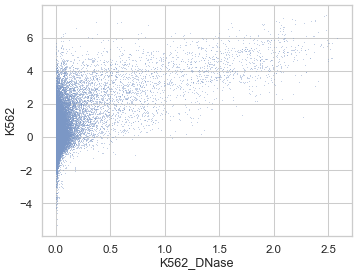

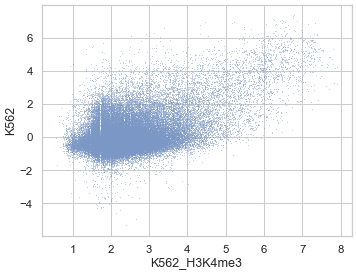

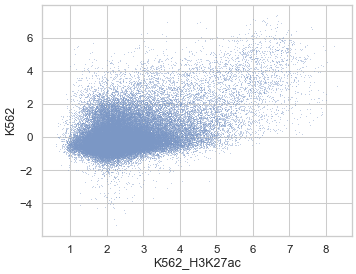

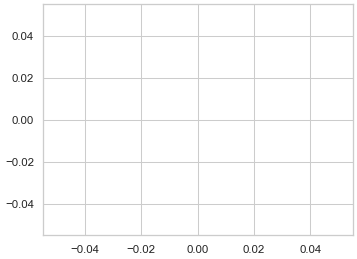

In [21]:
for i, cell_type in enumerate(cell_types[:1]):
    for j, assay in enumerate(assays):
        plt.figure(figsize=(8, 6), dpi=50)
        x = MPRA_df[f'{cell_type}_{assay}'].copy()
        y = MPRA_df[cell_type].copy()
        sns.scatterplot(x=x[:100000], y=y[:100000], s=1)

In [46]:
pearson_df = pd.DataFrame(dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        df = MPRA_df
        pred = df[f'{cell_type}_{assay}']
        true = df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF
K562,0.517,0.475,0.440,NaN
HepG2,0.406,0.447,0.249,NaN
SK-N-SH,0.482,0.505,0.291,NaN
HCT116,0.460,0.461,0.393,NaN
A549,0.443,0.440,0.326,NaN


In [17]:
MPRA_df.to_csv('Gosai_MPRA_seq_feature_quantile_norm.csv', index=False)